In [1]:
## Data Preprocessing
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    GridSearchCV

## Accuracy calculation
from sklearn import metrics
from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score

## Generate Dataset
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

## Find out execution time
from datetime import datetime

## Graph visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('_inputs/Wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = df.drop(columns=['Type'])
Y = df[['Type']]

In [6]:
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
Y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# Decision Tree

In [9]:
dt = DecisionTreeClassifier(random_state=42)

startTime = datetime.now()

param_grid = {
#     'max_features': list(range(1,X_train.shape[1])),
    'max_depth' : [4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
#     'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)
}

CV_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)
CV_dt.fit(X_train, y_train)

print(CV_dt.best_params_)

print(datetime.now() - startTime)

{'criterion': 'entropy', 'max_depth': 4}
0:00:01.045863


In [10]:
dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 4,
#     max_features = 11,
#     min_samples_leaf = 0.1,
#     min_samples_split = 0.1
)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred = dt.predict(X_test)
pred_prob = dt.predict_proba(X_test)

print(classification_report(y_test, pred))

dt_score = dt.score(X_test,y_test)
print('Score of decision tree classifier: ', dt_score)

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        23
           2       0.84      0.95      0.89        22
           3       0.88      0.78      0.82         9

   micro avg       0.91      0.91      0.91        54
   macro avg       0.90      0.88      0.89        54
weighted avg       0.91      0.91      0.91        54

Score of decision tree classifier:  0.9074074074074074


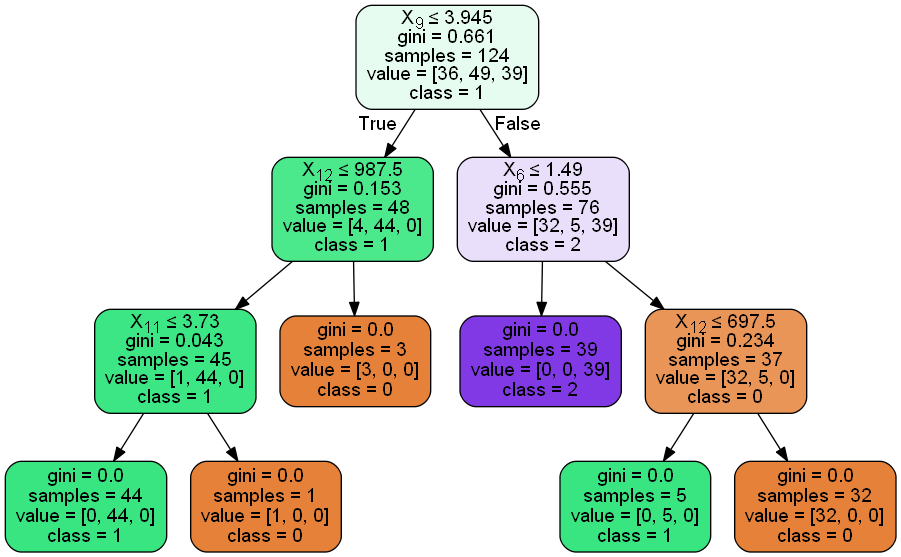

In [11]:
dot_data = StringIO()

export_graphviz(dt, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
#                 feature_names = X_train.columns.values, 
                class_names=['0','1', '2', '3', '4'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# graph.write_png('UserActivity_2.png')

Image(graph.create_png())

In [12]:
print(dict(zip(X.columns, dt.feature_importances_)))

{'Alcohol': 0.0, 'Malic': 0.0, 'Ash': 0.0, 'Alcalinity': 0.0, 'Magnesium': 0.0, 'Phenols': 0.0, 'Flavanoids': 0.409372875844726, 'Nonflavanoids': 0.0, 'Proanthocyanins': 0.0, 'Color': 0.39553303419999086, 'Hue': 0.0, 'Dilution': 0.023871715779571673, 'Proline': 0.1712223741757114}


# Bagging

In [13]:
score = np.array([])

startTime = datetime.now()

for i in np.arange(3) + 4: # [4, 5, 6] max_depth
    for j in [100, 200, 300]:
        bc = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth = i), n_estimators = j)
        mod_cv = cross_val_score(bc, X_train, y_train, cv = 5)
        score = np.append(score, np.mean(mod_cv))
        print("max_depth->", i, "n_estimators->", j, "Mean->", np.mean(mod_cv))

max_depth-> 4 n_estimators-> 100 Mean-> 0.9766153846153847
max_depth-> 4 n_estimators-> 200 Mean-> 0.9689230769230768
max_depth-> 4 n_estimators-> 300 Mean-> 0.9766153846153847
max_depth-> 5 n_estimators-> 100 Mean-> 0.9686153846153847
max_depth-> 5 n_estimators-> 200 Mean-> 0.9686153846153847
max_depth-> 5 n_estimators-> 300 Mean-> 0.9689230769230768
max_depth-> 6 n_estimators-> 100 Mean-> 0.9689230769230768
max_depth-> 6 n_estimators-> 200 Mean-> 0.9766153846153847
max_depth-> 6 n_estimators-> 300 Mean-> 0.9689230769230768


In [14]:
bc = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth = 4), n_estimators = 100)

bc = bc.fit(X_train,y_train)

pred = bc.predict(X_test)
pred_prob = bc.predict_proba(X_test)

print(classification_report(y_test, pred))

bc_score = bc.score(X_test,y_test)
print('Score of Bagging classifier: ', bc_score)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.95      0.95      0.95        22
           3       0.90      1.00      0.95         9

   micro avg       0.96      0.96      0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54

Score of Bagging classifier:  0.9629629629629629


In [15]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bc.estimators_
], axis=0)

print(dict(zip(X.columns, feature_importances)))

{'Alcohol': 0.06380306811113391, 'Malic': 0.004287954364915228, 'Ash': 0.0031908908138175074, 'Alcalinity': 0.0016762146183468662, 'Magnesium': 0.023147245152955586, 'Phenols': 0.0026021881540949188, 'Flavanoids': 0.2499795585489328, 'Nonflavanoids': 0.001999169445262126, 'Proanthocyanins': 0.004854070922406794, 'Color': 0.24454731627234808, 'Hue': 0.017224417626179198, 'Dilution': 0.14677326273502478, 'Proline': 0.23591464323458222}


# Best Model Selection

In [16]:
print('Score of decision tree classifier: ', dt_score)
print('Score of AdaBoost classifier: ', bc_score)

Score of decision tree classifier:  0.9074074074074074
Score of AdaBoost classifier:  0.9629629629629629
